# **Assignment: Multiple linear regression**

In [1]:
install.packages("mlbench")
install.packages("ggpubr")
install.packages("EnvStats")
install.packages("nortest")
install.packages("GGally")
install.packages("car")
install.packages("performance")
install.packages("see")
install.packages("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘nortest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘insight’, ‘da

In [2]:
library(mlbench)
library(tidyverse)
library(ggpubr)
library(EnvStats)
library(nortest)
library(car)
library(GGally)
library(performance)
library(see)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:EnvStats’:

    qqPlot


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
download.file("https://drive.usercontent.google.com/uc?id=1IMmXEwpmBQabfKti4ld_a_v8isWx78IL&authuser=0&export=download",
              tf <- tempfile())
cal<-readRDS(tf)

In [ ]:
glimpse(cal)

Rows: 8,771
Columns: 3
$ age  <dbl> 62, 71, 52, 64, 66, 30, 61, 77, 40, 61, 68, 70, 29, 63, 77, 48, 3…
$ vitd <dbl> 58.8, 81.8, 78.4, 61.9, 53.3, 39.1, 51.1, 34.5, 39.7, 76.5, 37.3,…
$ cal  <dbl> 9.5, 10.0, 9.0, 9.1, 8.9, 9.3, 9.9, 8.6, 9.3, 8.9, 9.2, 9.4, 9.6,…


# Data dictionary

| Variable | Definition           | Unit  |
|----------|----------------------|-------|
| Age      | Age                  | year  |
| vitd     | Serum vitamin D level| ng/mL |
| cal      | Serum calcium level  | mg/dL |

**Set hypothesis**

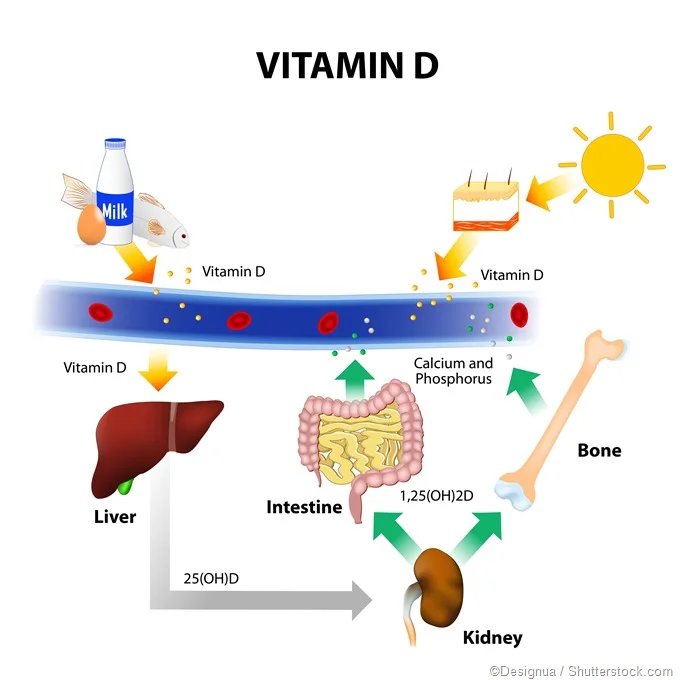

With higher levels of vitamin D, the body absorbs dietary calcium more effectively

Y: Serum calcium, X: Serum Vitamin D

# **Explanatory**

Identify the association between serum vitamin D levels and serum calcium levels. (use the given dataset)

**Check variables**

In [4]:
lapply(cal,class)

$age
[1] "numeric"

$vitd
[1] "numeric"

$cal
[1] "numeric"

In [8]:
cal<-cal[,c(3,2,1)]

**Data visualization**

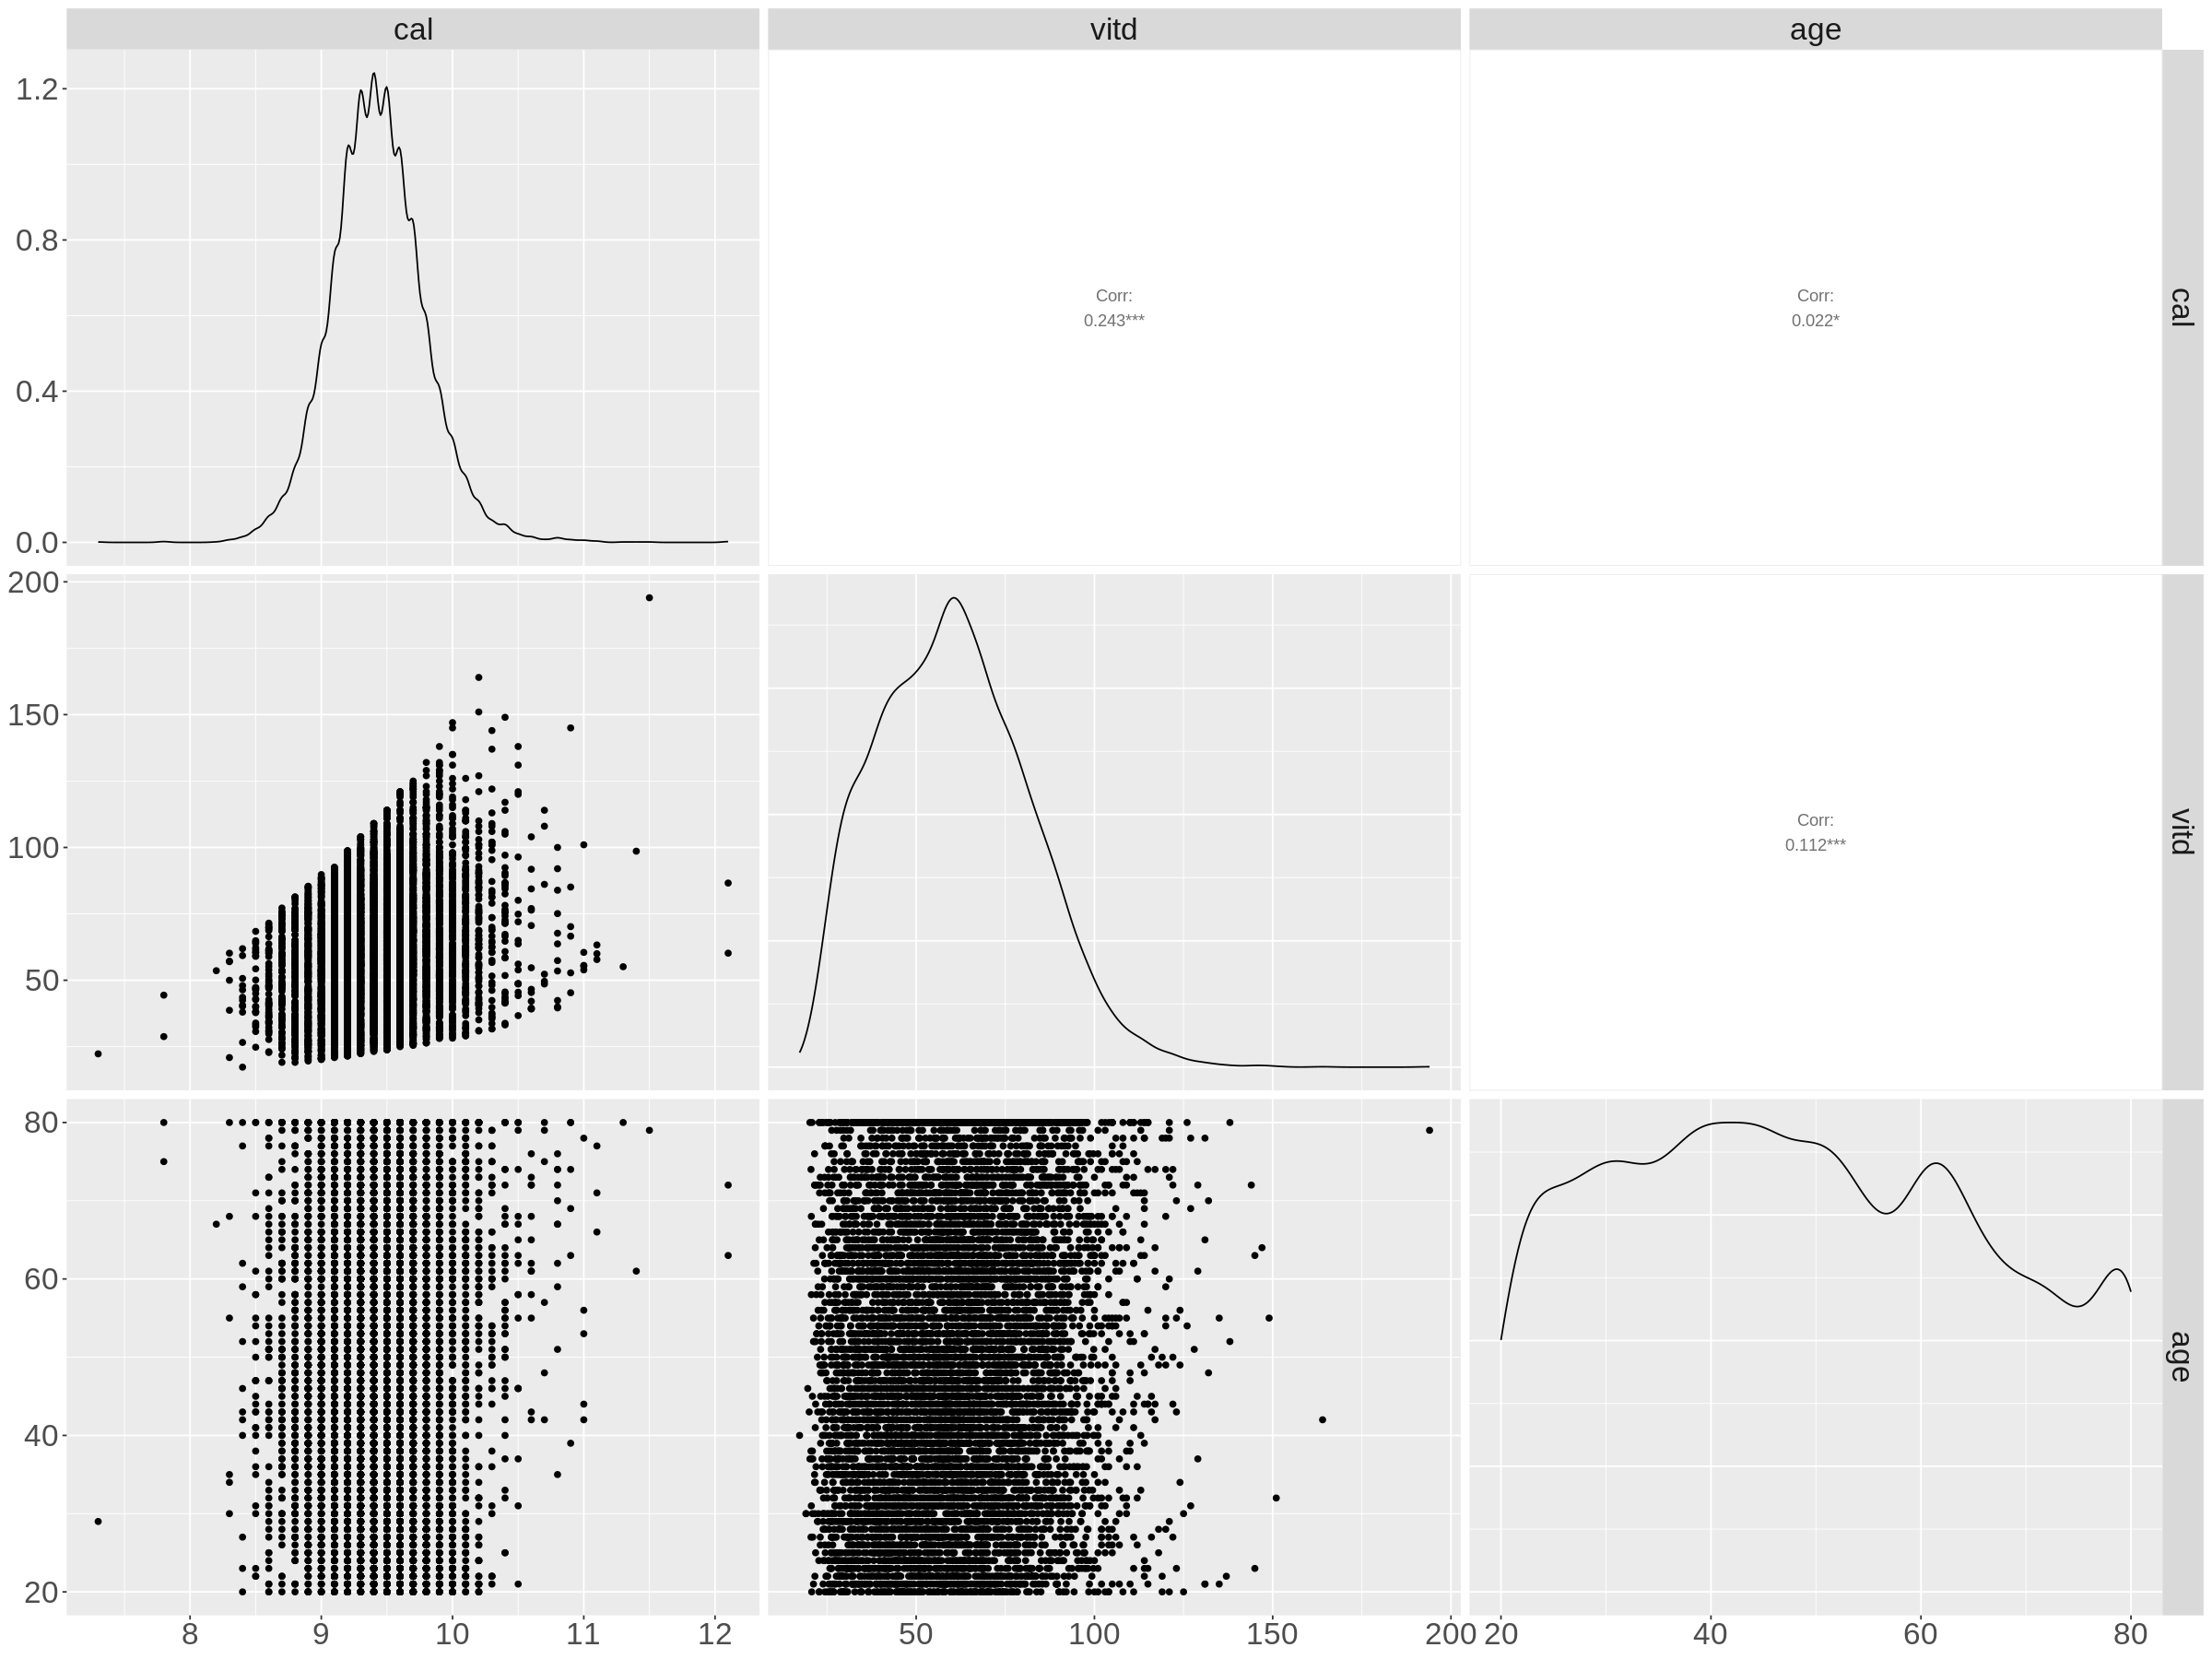

In [14]:
options(repr.plot.width=20, repr.plot.height=15)
ggpairs(cal)+
            theme(text = element_text(size = 25))

**Transform data**

In [10]:
cal2<-data.frame(cal=cal$cal,log.vitd=log(cal$vitd),age=cal$age)

**Recheck**

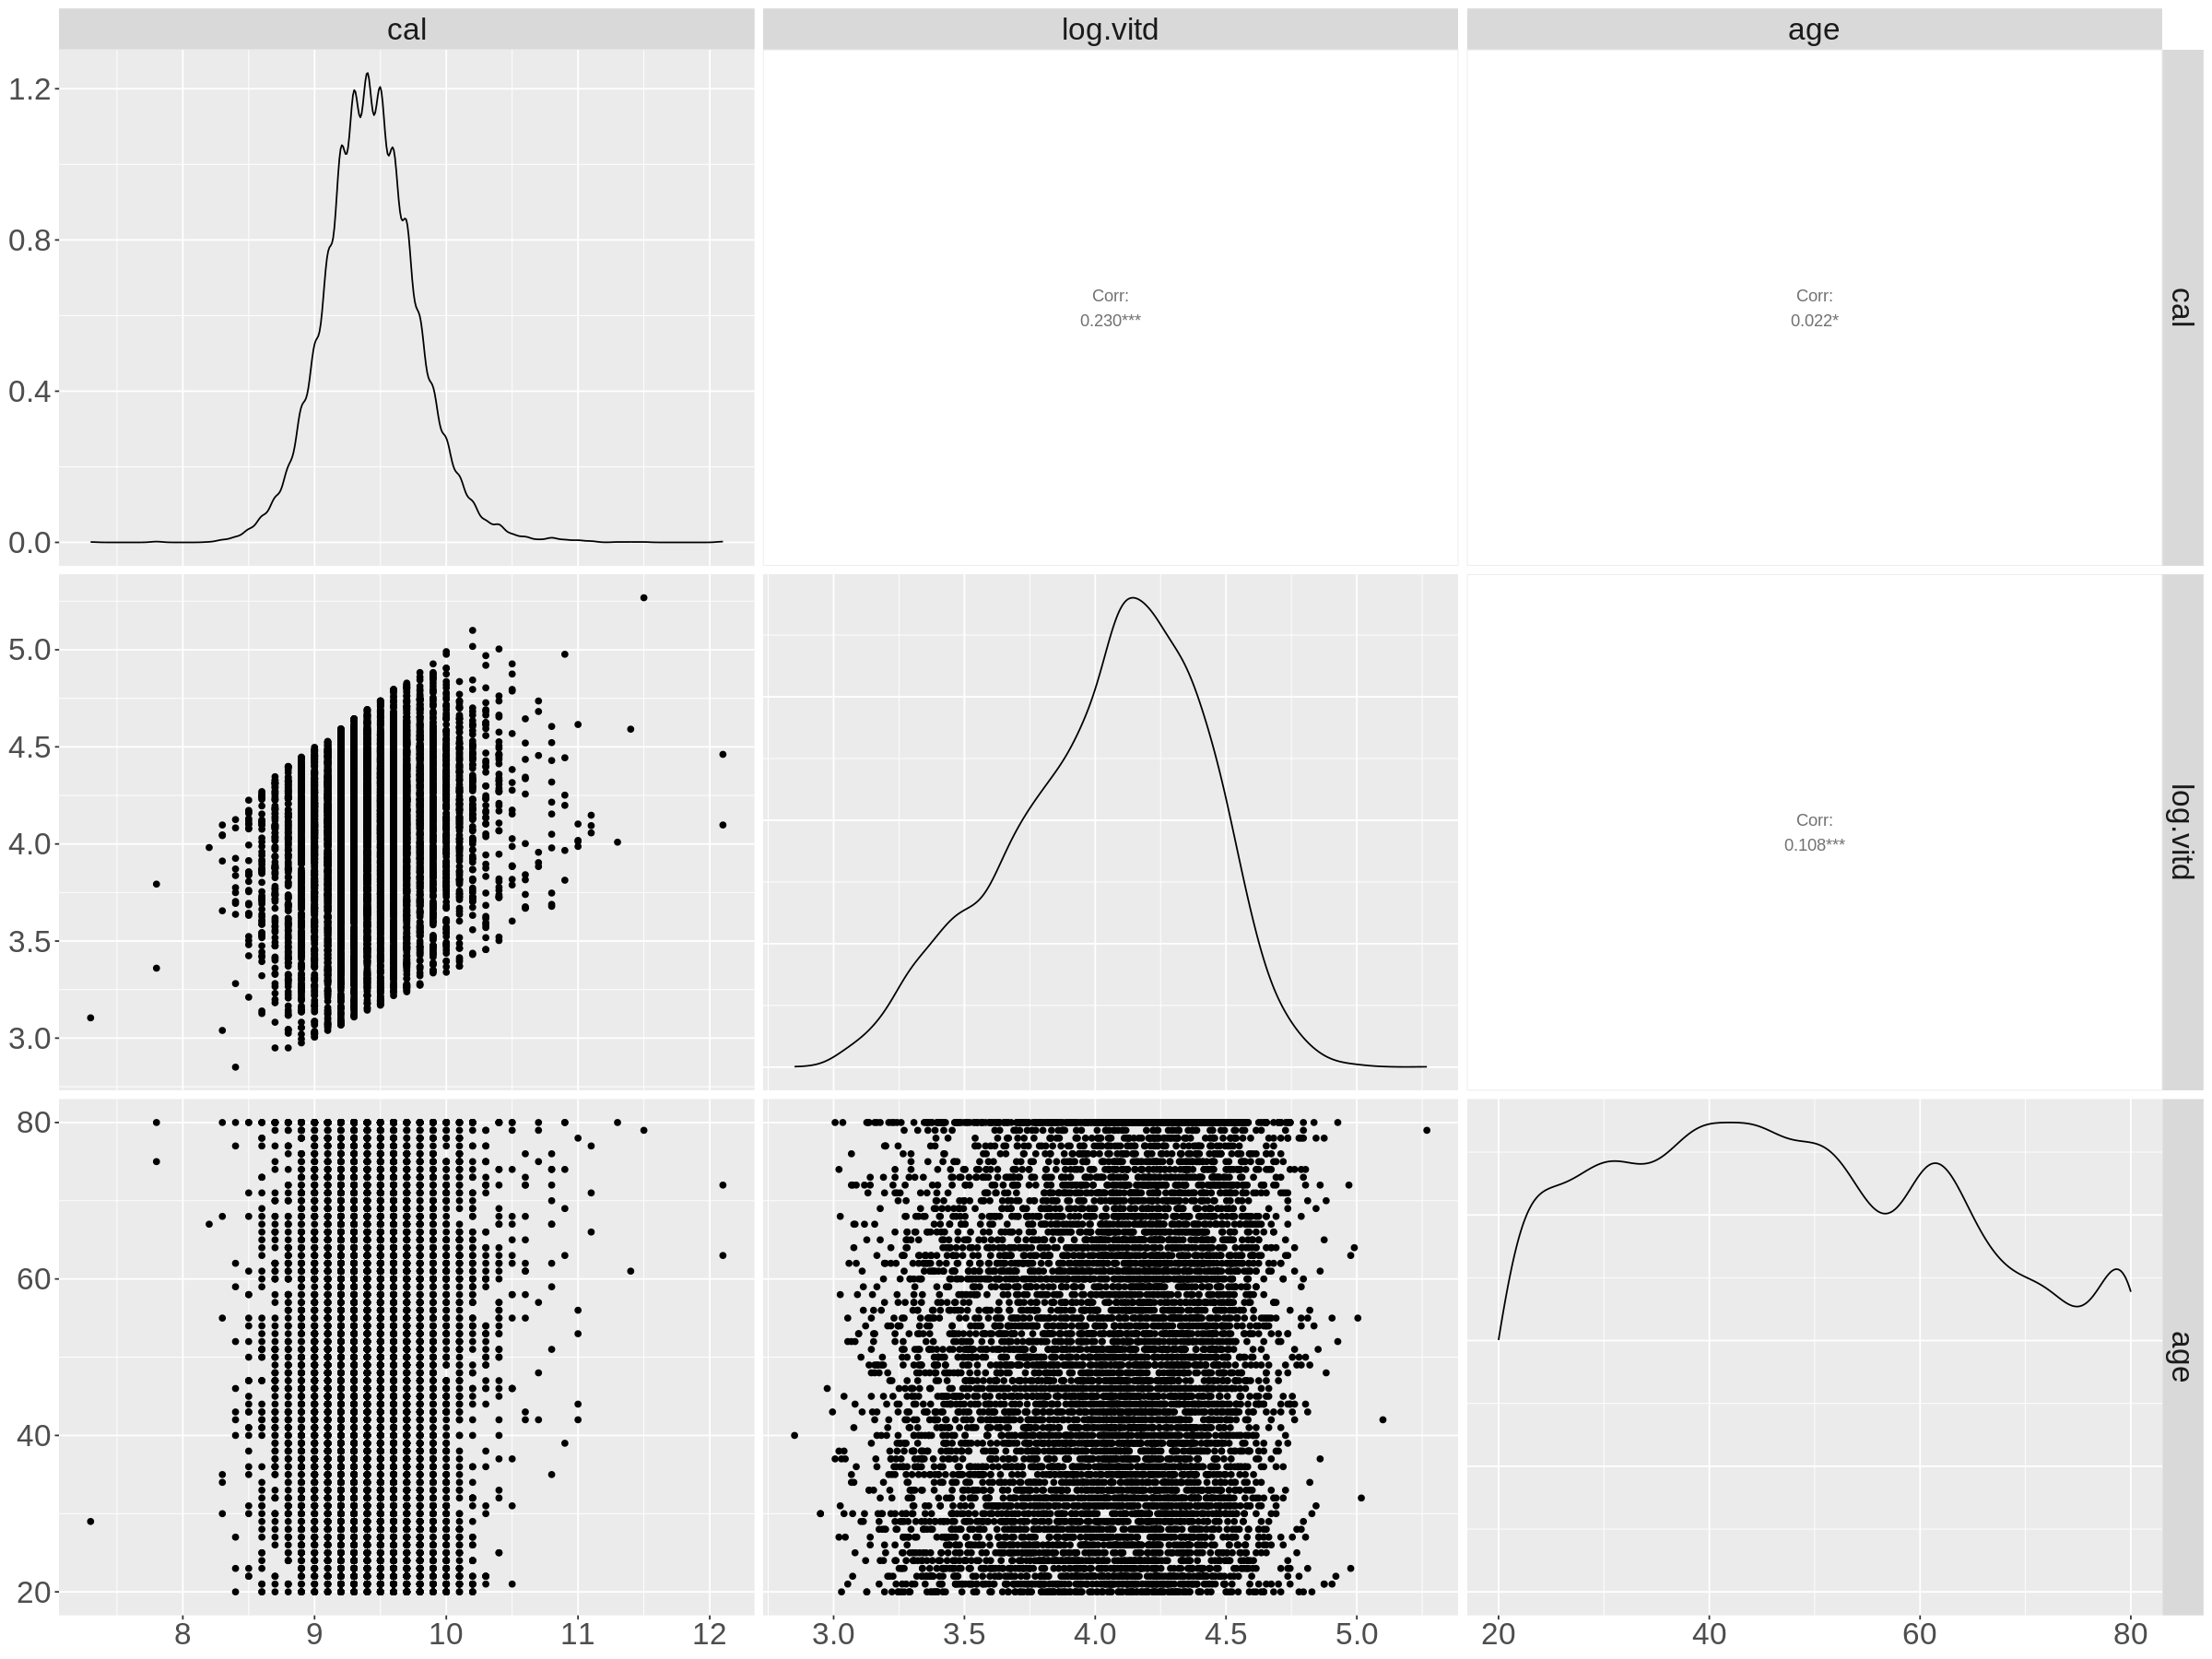

In [15]:
ggpairs(cal2)+
            theme(text = element_text(size = 25))

**Check multicollinearity**

In [19]:
vif_result<-vif(lm(cal ~ log.vitd + age, dat= cal2))

In [21]:
data.frame(vif=vif_result)

,vif
,<dbl>
log.vitd,1.011715
age,1.011715


**Construct model**

In [22]:
Explan_mod<-lm(cal~log.vitd + age, dat = cal2)

**Regression diagnostics**

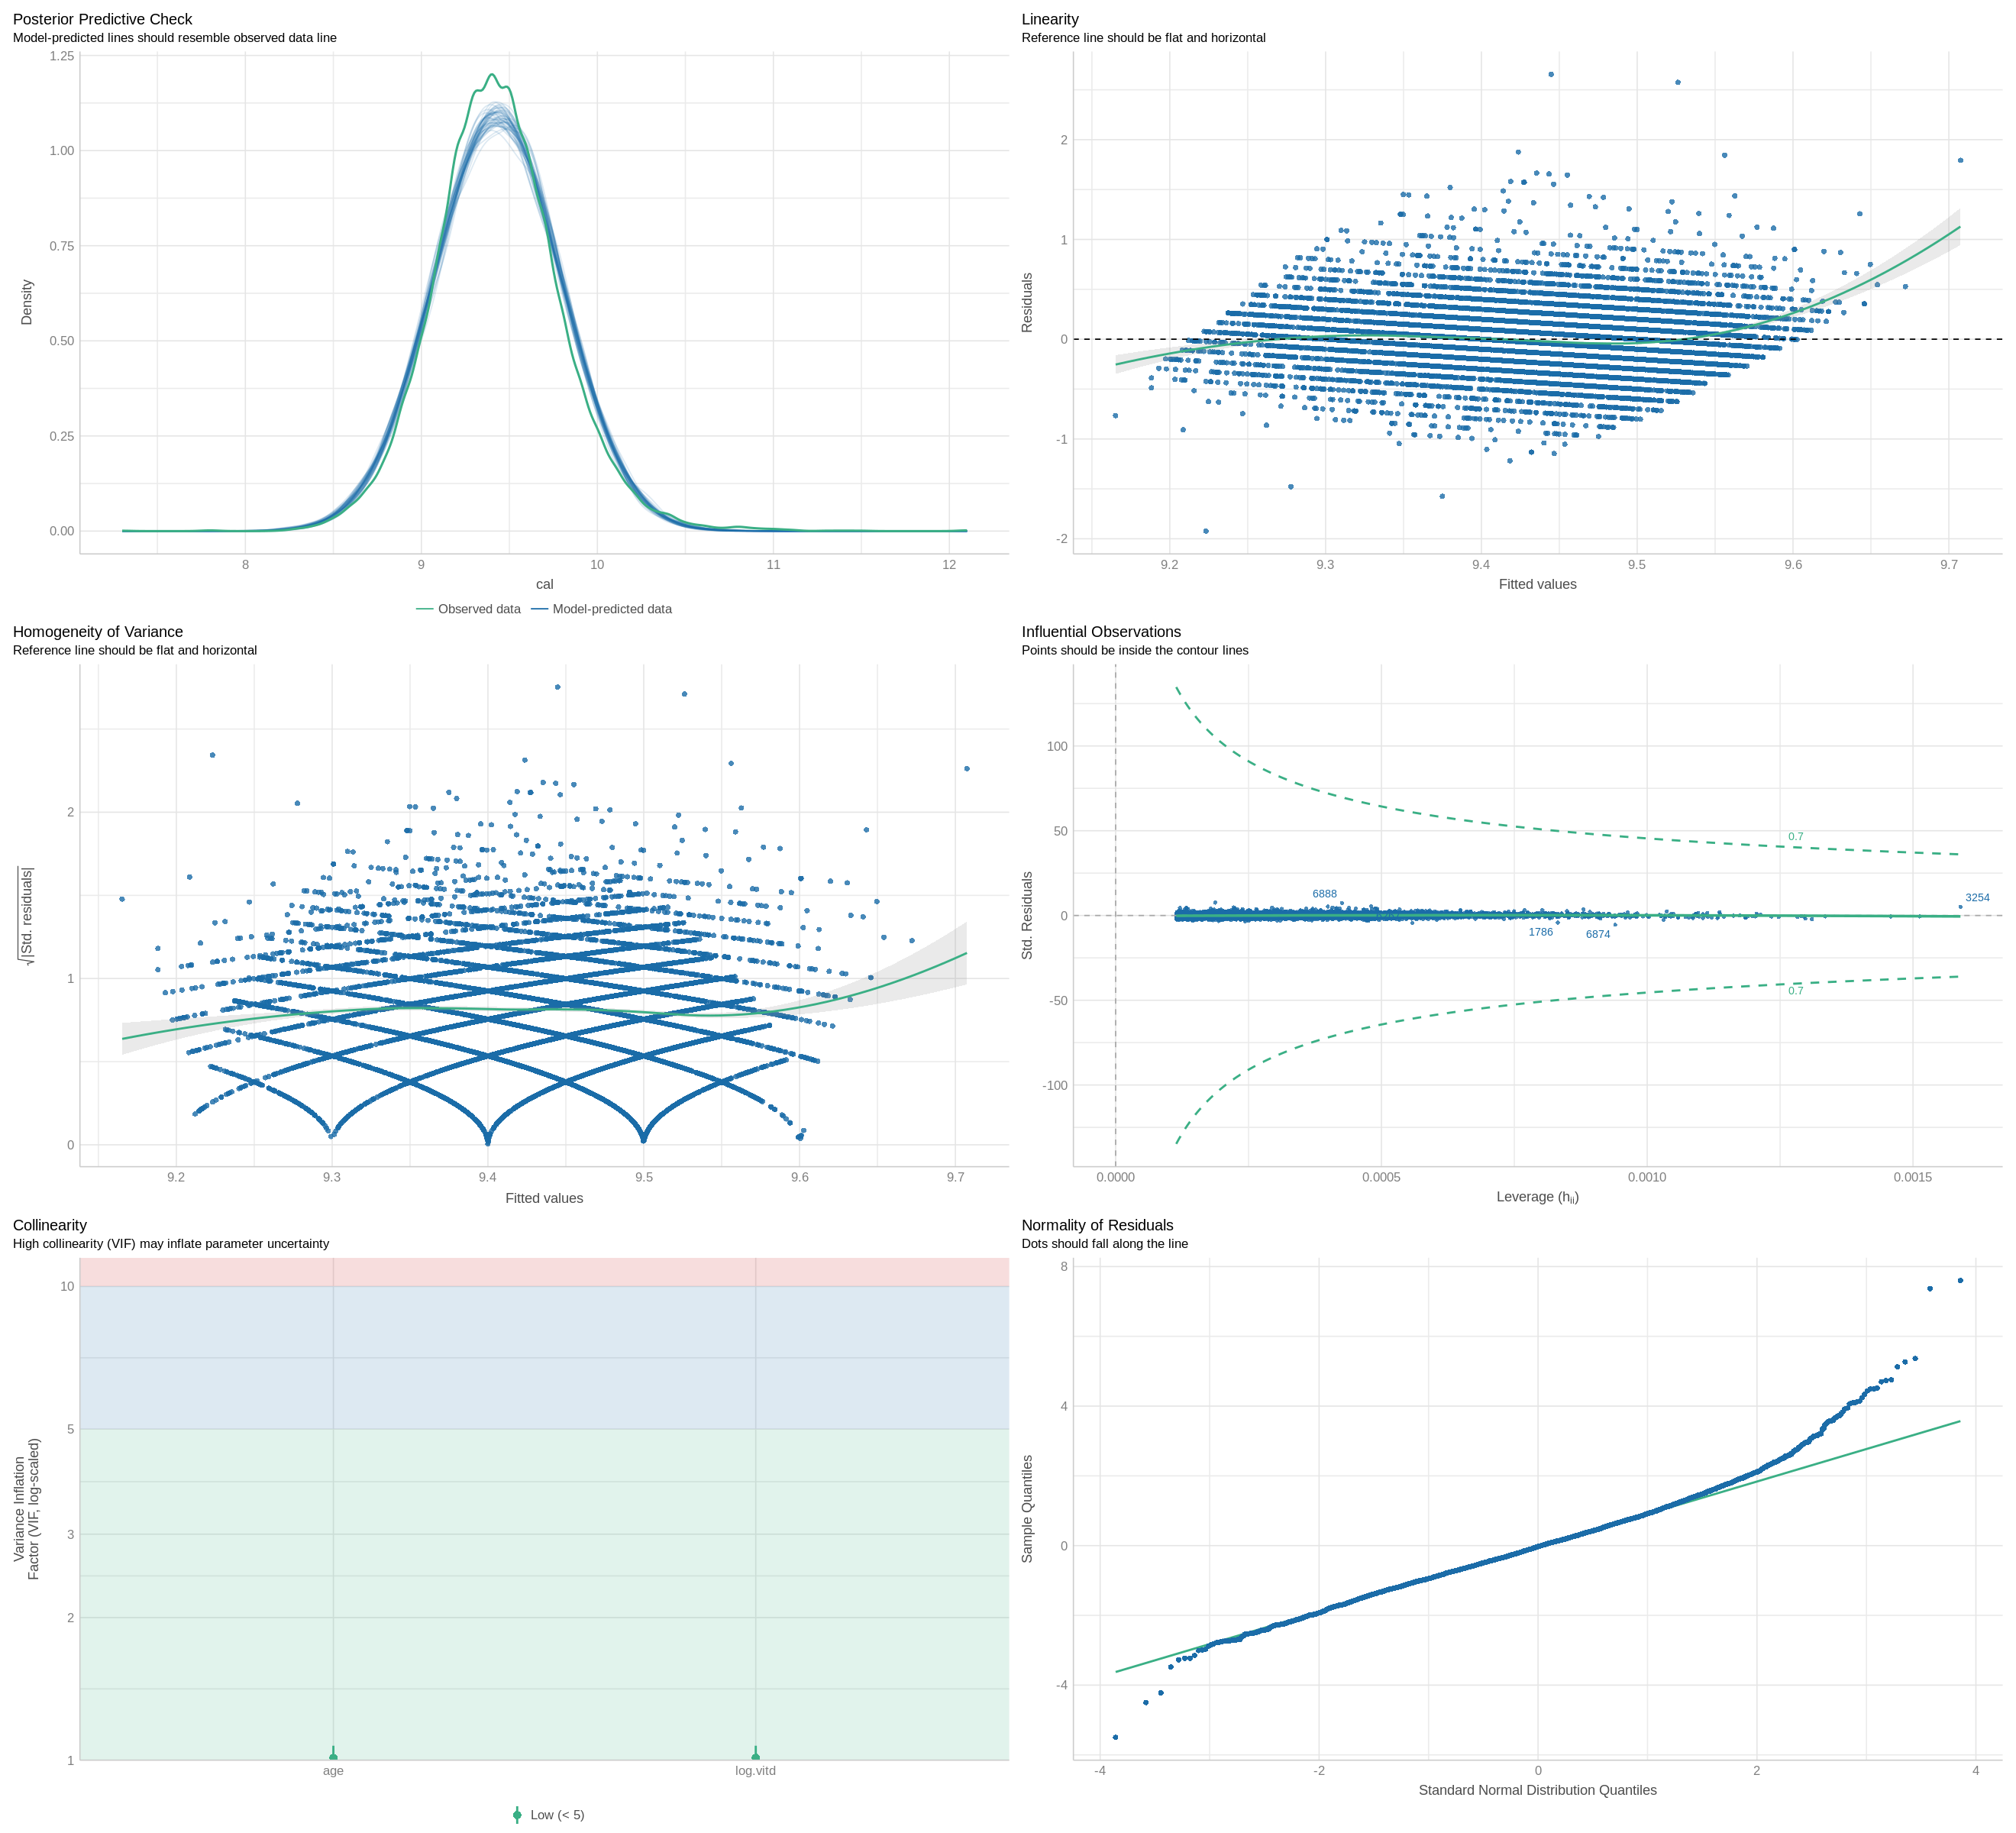

In [23]:
options(repr.plot.width=22, repr.plot.height=20)
check_model(Explan_mod)

In [27]:
cook_values <- cooks.distance(Explan_mod)
n <- length(cook_values)
k <- length(coef(Explan_mod)) - 1
threshold <- 4 / (n - k - 1)
influential_obs <- which(cook_values > threshold)

In [28]:
cal2[unique(influential_obs),]

,cal,log.vitd,age
,<dbl>,<dbl>,<dbl>
8,8.6,3.540959,77
15,10.2,4.152613,77
19,10.0,3.893859,80
20,10.9,4.251348,80
30,10.4,4.306764,37
36,10.1,3.668677,78
41,10.4,4.286341,32
60,8.7,4.084294,26
71,10.1,3.414443,27


In [29]:
nrow(cal2[unique(influential_obs),]) < 0.01*nrow(cal2)

[1] FALSE

**Take the output with influencial values**

In [24]:
summary(Explan_mod)


Call:
lm(formula = cal ~ log.vitd + age, data = cal2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92321 -0.22980 -0.01067  0.21098  2.65524 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.525e+00  4.170e-02 204.452   <2e-16 ***
log.vitd     2.254e-01  1.022e-02  22.051   <2e-16 ***
age         -6.787e-05  2.152e-04  -0.315    0.753    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3506 on 8768 degrees of freedom
Multiple R-squared:  0.05298,	Adjusted R-squared:  0.05277 
F-statistic: 245.3 on 2 and 8768 DF,  p-value: < 2.2e-16


After adjusting for age and keeping influential values, there is a statistically significant positive association between the log of serum Vitamin D levels and serum calcium levels.

**Take the output without influencial values**

In [35]:
cal3<-cal2[-unique(influential_obs),]

In [36]:
Explan_mod2 <- lm(cal~log.vitd + age, dat = cal3)

In [67]:
summary(Explan_mod2)


Call:
lm(formula = cal ~ log.vitd + age, data = cal3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92133 -0.23020 -0.00992  0.21076  2.65656 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.520e+00  4.238e-02  201.07   <2e-16 ***
log.vitd     2.267e-01  1.039e-02   21.82   <2e-16 ***
age         -8.778e-05  2.195e-04   -0.40    0.689    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3505 on 8462 degrees of freedom
Multiple R-squared:  0.05366,	Adjusted R-squared:  0.05344 
F-statistic: 239.9 on 2 and 8462 DF,  p-value: < 2.2e-16


After adjusting for age and excluding influential values, there still is a statistically significant positive association between the log of serum Vitamin D levels and serum calcium levels.

**Interpret**

After adjusting for age, a robustly significant association is observed between the log of serum Vitamin D levels and serum calcium levels.

# **Prediction**

Construct a linear equation to predict serum calcium levels from serum vitamin D levels. (use the given dataset)

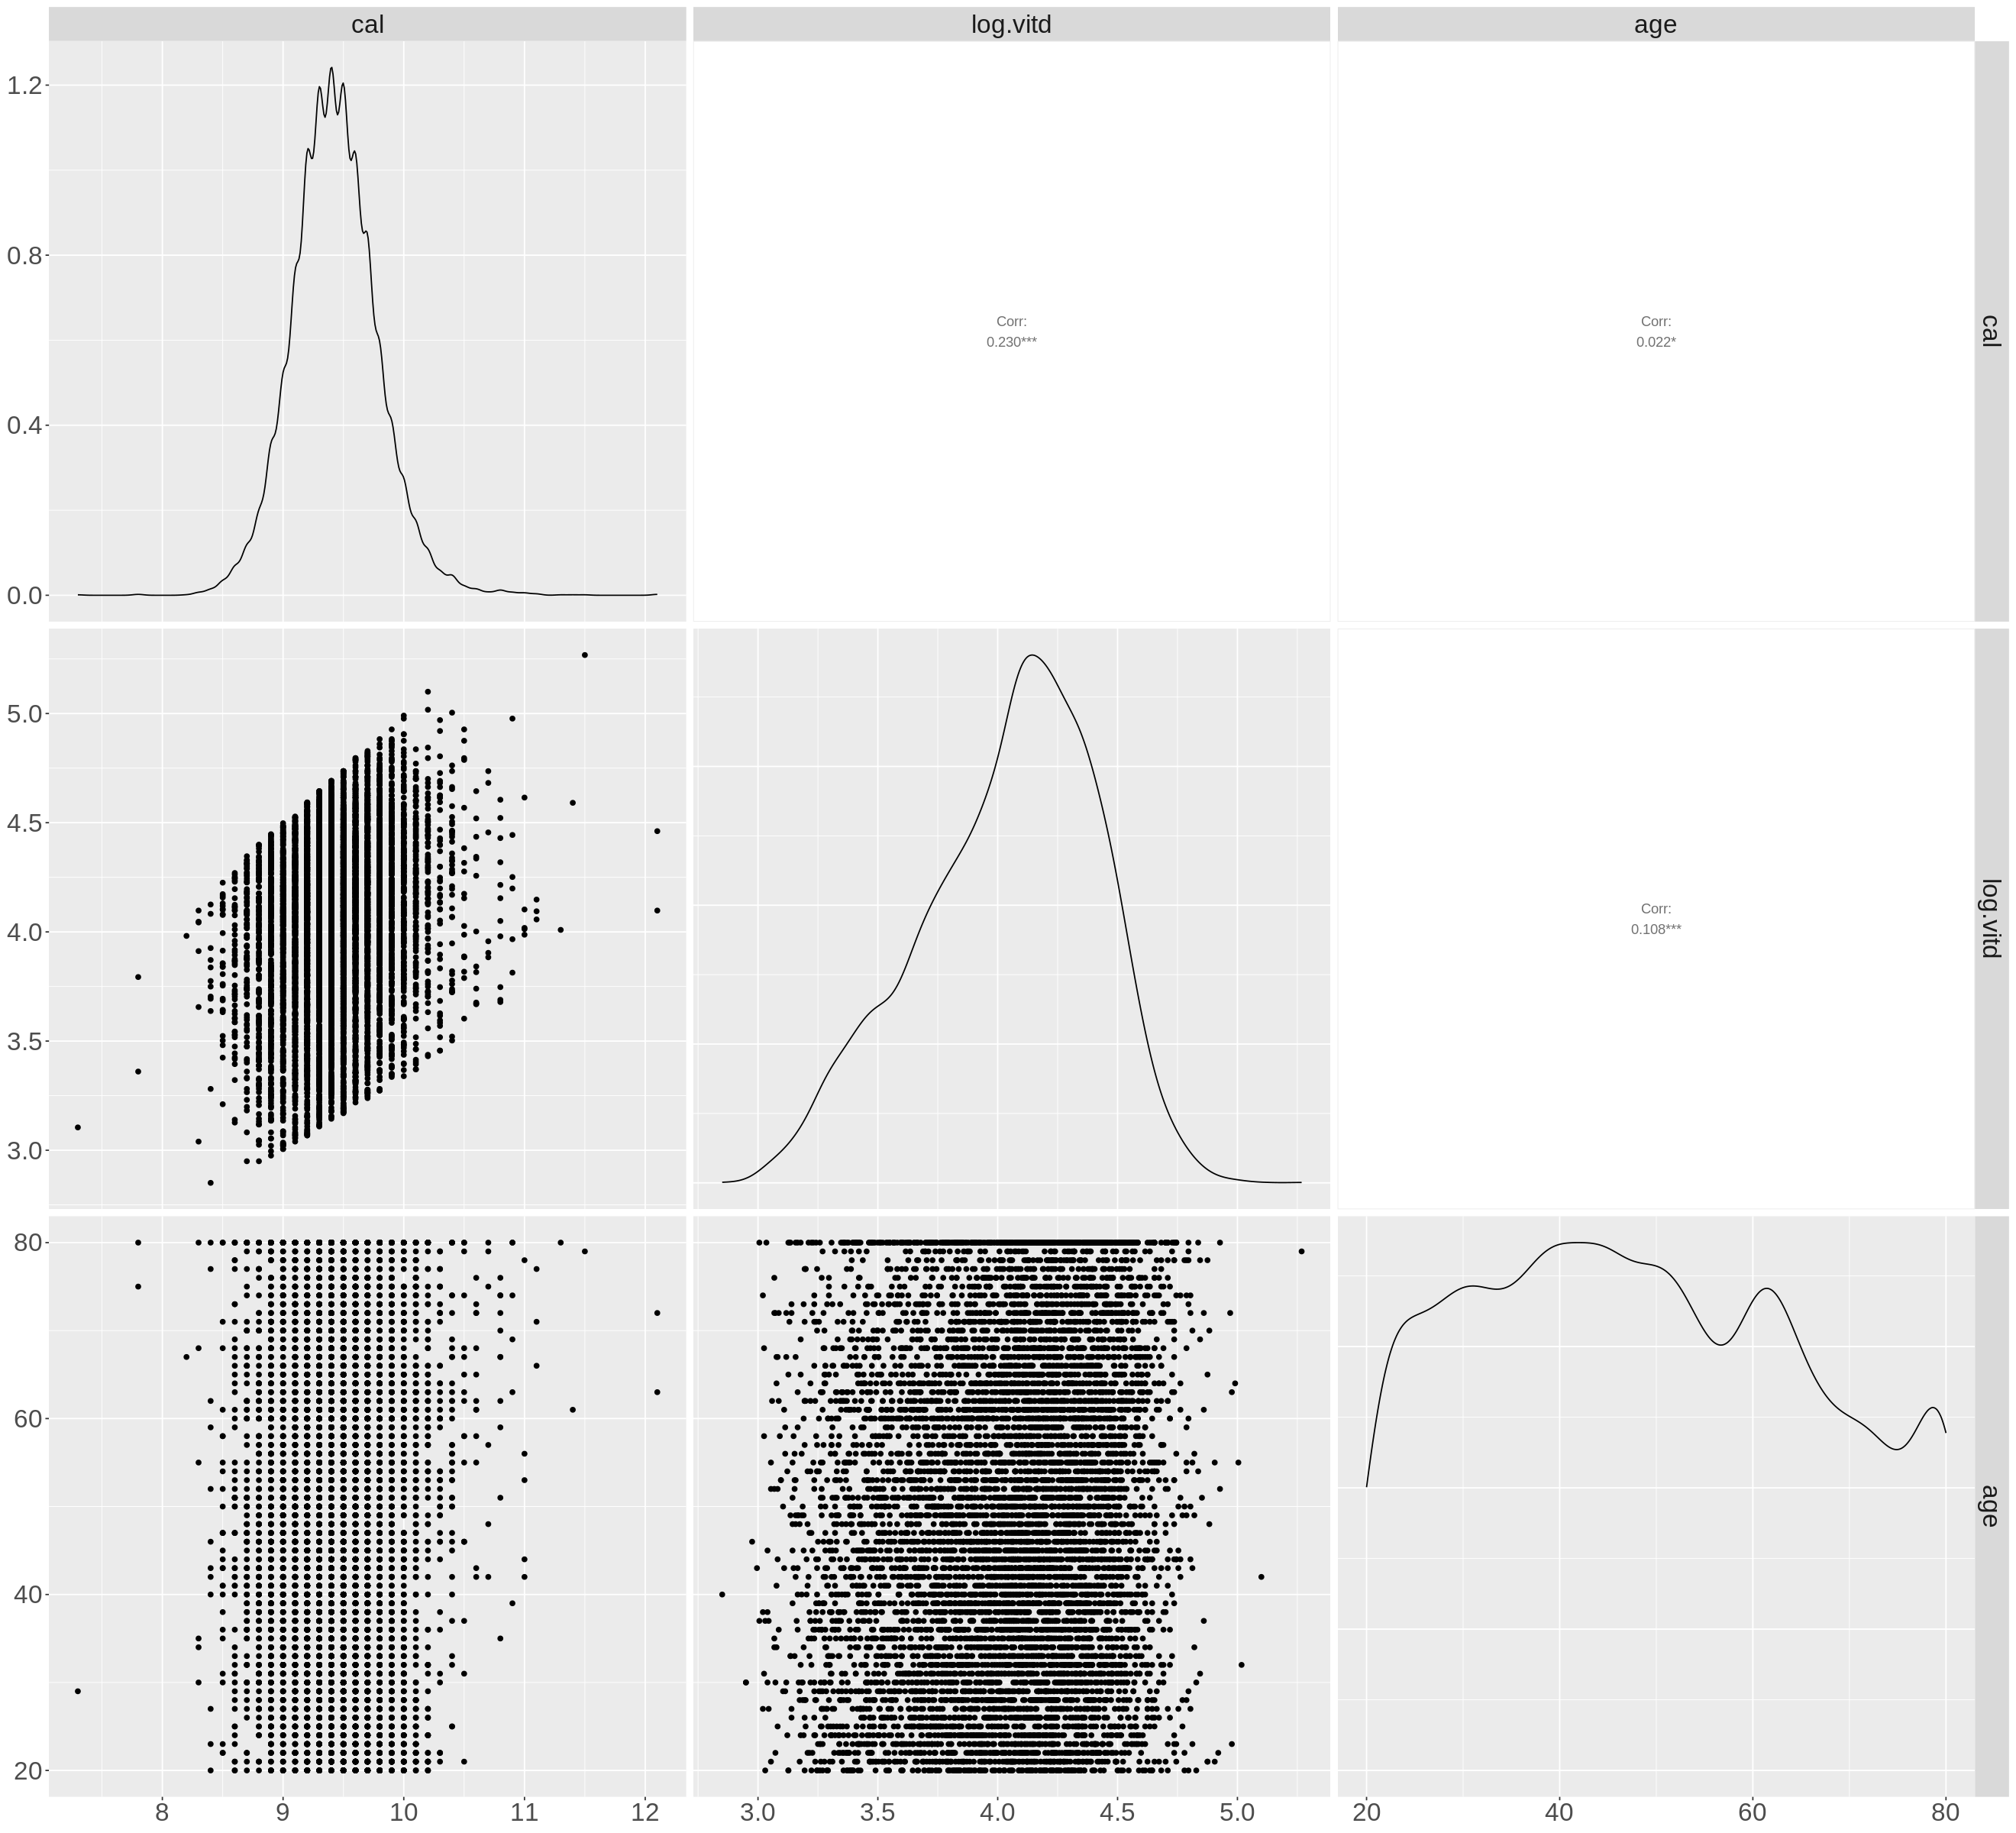

In [68]:
ggpairs(cal2)+
            theme(text = element_text(size = 25))

Consider excluding age from the predictive model, as the correlation coefficient r is less than 0.2, indicating a weak linear relationship.

**Construct the predictive model**

In [69]:
Pred_mod<-lm(cal ~ log.vitd,data = cal2)

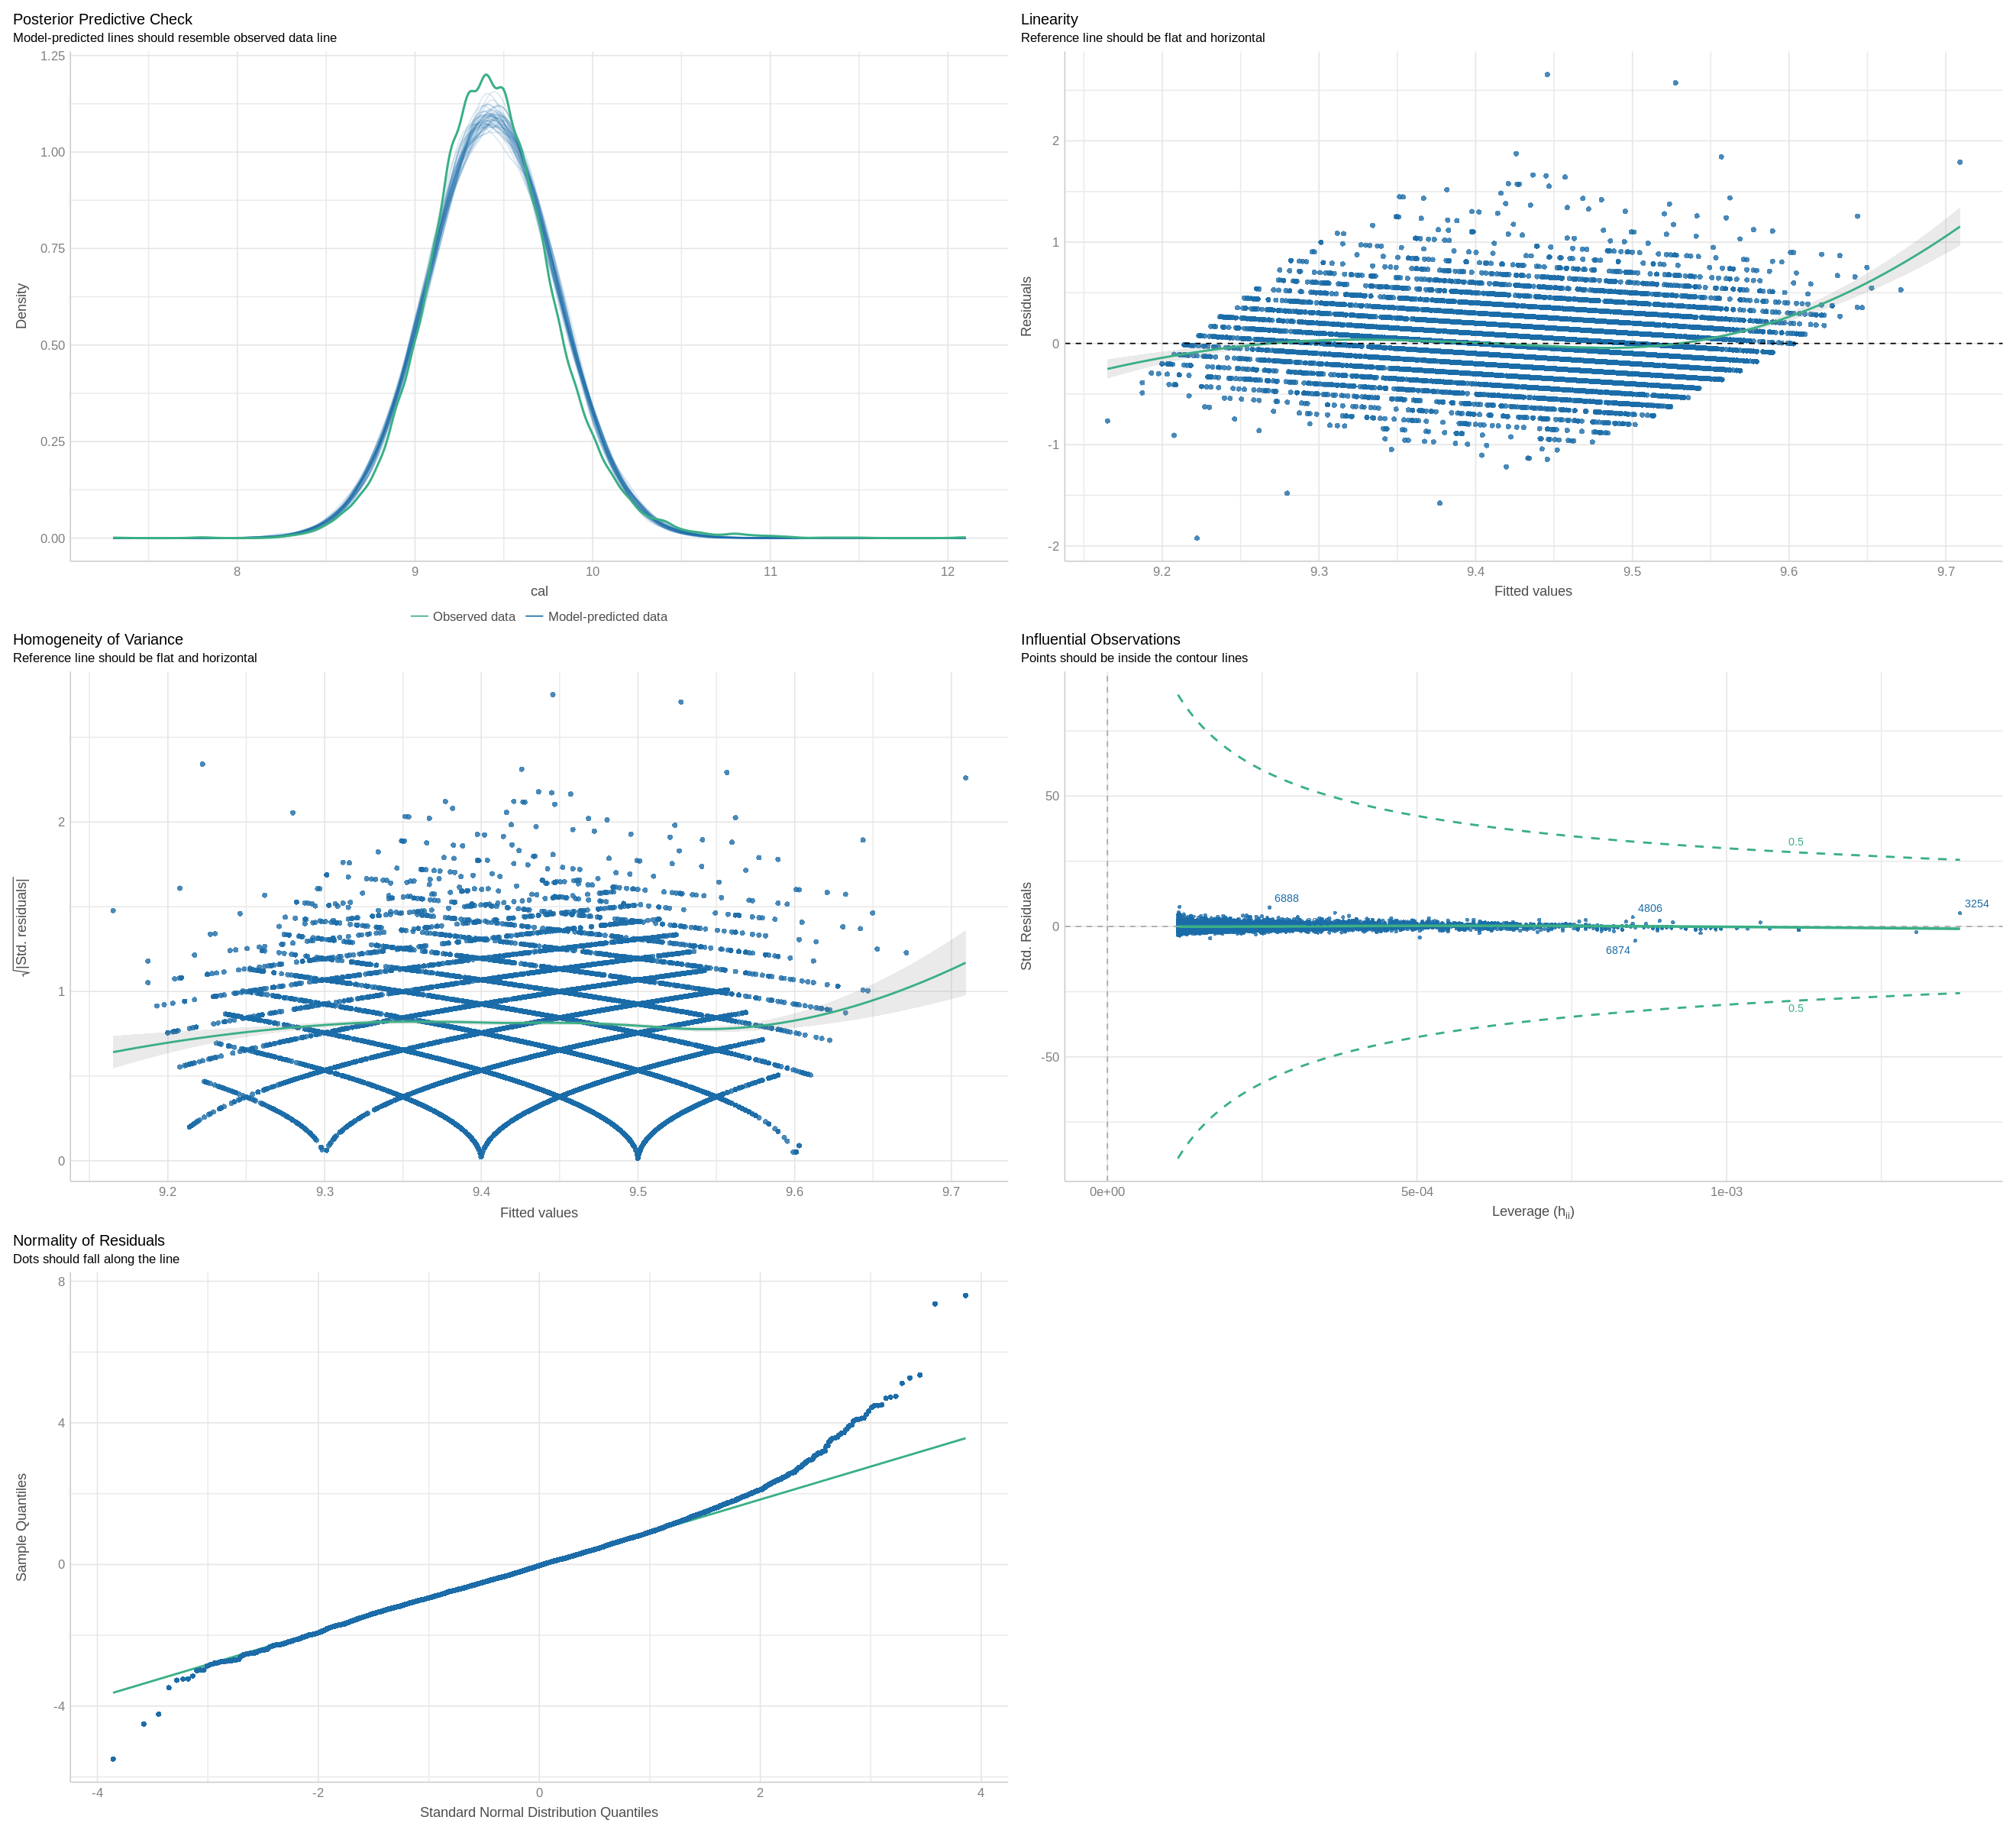

In [70]:
check_model(Pred_mod)

In [71]:
cook_values <- cooks.distance(Pred_mod)
n <- length(cook_values)
k <- length(coef(Pred_mod)) - 1
threshold <- 4 / (n - k - 1)
influential_obs <- which(cook_values > threshold)

In [73]:
length(unique(influential_obs))

[1] 401

In [75]:
length(unique(influential_obs))/nrow(cal2)*100

[1] 4.571885

4.6% of the data points are influential.

<font color='red'>**You should not exclude them !!!**</font>




In [76]:
summary(Pred_mod)


Call:
lm(formula = cal ~ log.vitd, data = cal2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9222 -0.2301 -0.0110  0.2105  2.6543 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.52342    0.04125  206.64   <2e-16 ***
log.vitd     0.22507    0.01016   22.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3506 on 8769 degrees of freedom
Multiple R-squared:  0.05297,	Adjusted R-squared:  0.05286 
F-statistic: 490.5 on 1 and 8769 DF,  p-value: < 2.2e-16


**Equation**

$$ cal = 8.52342 + 0.22507 \cdot \text{log(vitd)} + \epsilon $$


### Conclusion:
The model significantly predicts `cal` based on `log.vitd`, with both the intercept and the slope being highly significant. However, the low R-squared value suggests that `log.vitd` explains only a small portion of the variability in `cal`, implying the variation of influential data points not explained by the model. The relation between `cal` and `log.vitd` might be more complex, and further investigations with more variables and a more complex model (non-linear model) might be needed.
